In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# Step 2: Set image directory
image_dir ="C:\\Users\\rida6\\Downloads\\glasses\\Images"


In [3]:
# Step 3: Image Preprocessing & Splitting
img_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = img_gen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = img_gen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 3937 images belonging to 2 classes.
Found 983 images belonging to 2 classes.


In [4]:
# Step 4: Model Building
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [6]:
# Step 5: Model Training
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    epochs=2
)


Epoch 1/2
124/124 [==============================] - 107s 869ms/step - loss: 0.0541 - accuracy: 0.9845 - val_loss: 0.0059 - val_accuracy: 0.9980
Epoch 2/2
124/124 [==============================] - 55s 445ms/step - loss: 0.0228 - accuracy: 0.9942 - val_loss: 0.0085 - val_accuracy: 0.9980


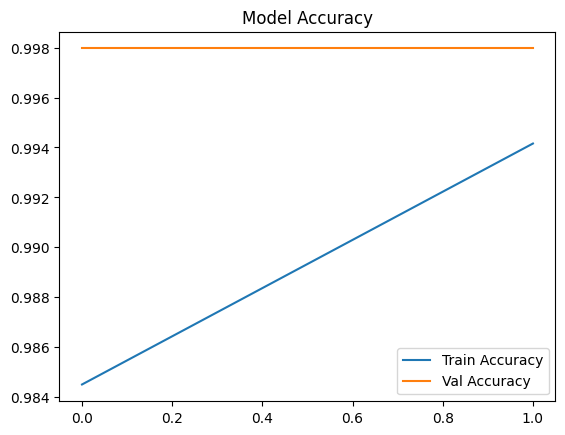

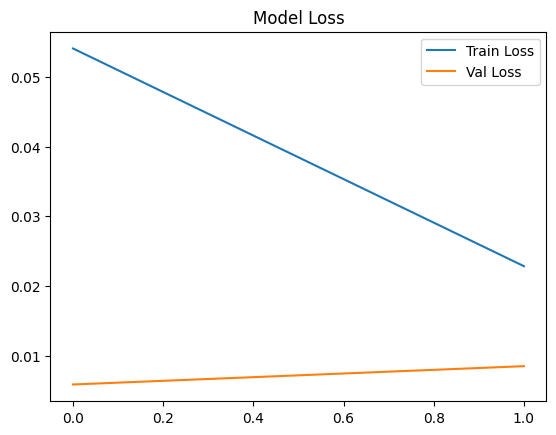

In [7]:
# Step 6: Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [8]:
# Step 7: Save Model
model.save("glasses_classifier_model.h5")
print("Model saved as glasses_classifier_model.h5")


Model saved as glasses_classifier_model.h5


In [15]:
from tensorflow.keras.models import load_model

model = load_model("glasses_classifier_model.h5")

img_path = "C:\\Users\\rida6\\OneDrive\\Desktop\\istockphoto-1335941248-612x612.jpg"  # replace with your image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Predicted: No Glasses ")
else:
    print("Predicted: Wearing Glasses ")



1/1 [==============================] - 0s 60ms/step
Predicted: No Glasses 
